In [1]:
# pip install mne

In [2]:
import numpy as np
import mne , glob
import matplotlib.pyplot as plt

from scipy.io import loadmat 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [3]:
# matfiles = glob.glob('*.mat', *, recursive=True)

# data = {}
# matfiles
path = 'train_01_16/*.mat'
matfiles = glob.glob(path, recursive=True)

for file in matfiles:
    print(file)

train_01_16\train_subject01.mat
train_01_16\train_subject02.mat
train_01_16\train_subject03.mat
train_01_16\train_subject04.mat
train_01_16\train_subject05.mat
train_01_16\train_subject06.mat
train_01_16\train_subject07.mat
train_01_16\train_subject08.mat
train_01_16\train_subject09.mat
train_01_16\train_subject10.mat
train_01_16\train_subject11.mat
train_01_16\train_subject12.mat
train_01_16\train_subject13.mat
train_01_16\train_subject14.mat
train_01_16\train_subject15.mat
train_01_16\train_subject16.mat


In [4]:
s1 = loadmat(matfiles[0])

In [5]:
s1

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Sat Apr  5 19:16:41 2014',
 '__version__': '1.0',
 '__globals__': [],
 'tmin': array([[-0.5]]),
 'tmax': array([[1.]]),
 'sfreq': array([[250.]]),
 'y': array([[0],
        [0],
        [1],
        [1],
        [0],
        [0],
        [0],
        [1],
        [0],
        [1],
        [1],
        [1],
        [0],
        [1],
        [0],
        [1],
        [1],
        [0],
        [1],
        [1],
        [1],
        [1],
        [1],
        [0],
        [1],
        [0],
        [1],
        [0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [1],
        [0],
        [1],
        [1],
        [1],
        [1],
        [0],
        [1],
        [1],
        [0],
        [0],
        [1],
        [1],
        [0],
        [1],
        [0],
        [1],
        [1],
        [0],
        [0],
        [1],
        [1],
        [0],
        [1],
        [1],
        [0],
        [0],
  

In [6]:
s1['y'].shape

(594, 1)

In [7]:
s1['X'].shape

(594, 306, 375)

In [8]:
trials, channels, timepoints = s1['X'].shape

In [9]:
s1['X'][1].shape

(306, 375)

In [10]:
s1['X'][1][0].shape

(375,)

In [11]:
train_mats = []
for file in matfiles:
    print("Loading: ", file)
    train_mats.append(loadmat(file))

# Merging data
train_data = train_mats[0]['X']
train_labl = train_mats[0]['y']
for i in range(1, len(train_mats)):
    train_data = np.concatenate((train_data, train_mats[i]['X']), axis=0)
    train_labl = np.concatenate((train_labl, train_mats[i]['y']), axis=0)

del train_mats # Free RAM pls 
print('Done')
print(train_data.shape, type(train_data))
print(train_labl.shape, type(train_labl))

Loading:  train_01_16\train_subject01.mat
Loading:  train_01_16\train_subject02.mat
Loading:  train_01_16\train_subject03.mat
Loading:  train_01_16\train_subject04.mat
Loading:  train_01_16\train_subject05.mat
Loading:  train_01_16\train_subject06.mat
Loading:  train_01_16\train_subject07.mat
Loading:  train_01_16\train_subject08.mat
Loading:  train_01_16\train_subject09.mat
Loading:  train_01_16\train_subject10.mat
Loading:  train_01_16\train_subject11.mat
Loading:  train_01_16\train_subject12.mat
Loading:  train_01_16\train_subject13.mat
Loading:  train_01_16\train_subject14.mat
Loading:  train_01_16\train_subject15.mat
Loading:  train_01_16\train_subject16.mat
Done
(9414, 306, 375) <class 'numpy.ndarray'>
(9414, 1) <class 'numpy.ndarray'>


In [12]:
train_data

array([[[ 4.71374025e-12,  5.23809945e-12, -1.94108792e-12, ...,
          9.17573222e-12,  9.09685608e-12, -1.17312019e-11],
        [-2.05548699e-13,  8.94469936e-13,  2.32704286e-12, ...,
         -1.48542409e-12,  8.63054420e-13, -5.81151446e-12],
        [-2.81083967e-13, -2.55566591e-13, -1.14635813e-13, ...,
          2.02158684e-13,  2.64378851e-13,  1.49159080e-14],
        ...,
        [ 6.19402663e-12,  1.37941850e-12,  3.14390332e-13, ...,
         -3.57446451e-12, -6.13546627e-12, -2.76505771e-12],
        [-4.29254592e-12, -1.08209665e-11, -1.22503622e-11, ...,
         -2.13305805e-12,  1.59175234e-12,  4.20430834e-12],
        [-1.05882049e-14,  2.03639477e-14,  2.91915463e-15, ...,
         -5.75406489e-14, -1.58884204e-13, -1.19616773e-13]],

       [[-5.79273635e-14, -4.66763867e-12,  6.61672973e-13, ...,
          1.79052758e-12, -7.34683234e-12, -3.62885872e-12],
        [ 5.11112463e-12,  6.62023008e-13, -1.11373562e-12, ...,
         -1.58345776e-12,  1.52519013e

In [13]:
train_labl

array([[0],
       [0],
       [1],
       ...,
       [1],
       [0],
       [0]], dtype=int64)

In [14]:
# train_data = train_data[0:, 0:153 , 125 :375]

In [15]:
train_data =  train_data.reshape(train_data.shape[0], train_data.shape[1] * train_data.shape[2])

In [16]:
train_data

array([[ 4.7137402e-12,  5.2380995e-12, -1.9410879e-12, ...,
        -5.7540649e-14, -1.5888420e-13, -1.1961677e-13],
       [-5.7927364e-14, -4.6676387e-12,  6.6167297e-13, ...,
         2.8727099e-13,  1.6909830e-13,  1.1492741e-13],
       [-1.2277207e-12, -3.0099230e-12,  2.8300162e-13, ...,
        -3.4308913e-15, -8.2066088e-14,  2.9967522e-15],
       ...,
       [ 4.1830801e-12,  6.1464445e-12,  1.1955287e-11, ...,
        -1.6614291e-13, -2.4742502e-13, -1.8057470e-13],
       [-1.5639871e-11, -9.3946795e-12, -1.1964771e-11, ...,
        -1.9740104e-13, -1.5169364e-13, -1.5806520e-13],
       [-9.8289020e-13,  2.3674439e-12,  1.0458786e-11, ...,
        -1.7404665e-13, -2.1369748e-13, -5.9363057e-14]], dtype=float32)

In [17]:
train_data.shape

(9414, 114750)

In [18]:
print("Features Normalization.")
train_data -= train_data.mean(0)
train_data = np.nan_to_num(train_data / train_data.std(0))

Features Normalization.


In [19]:
X_train, X_test, y_train, y_test = train_test_split(train_data, train_labl, test_size = 0.2, shuffle=True)

In [20]:
lr = LogisticRegression()
lr.fit(X_train, y_train.ravel())
lr_pred = lr.predict(X_test)
print(classification_report(y_test, lr_pred))

C:\Users\Joshua\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.71      0.73      0.72       934
           1       0.72      0.71      0.72       949

    accuracy                           0.72      1883
   macro avg       0.72      0.72      0.72      1883
weighted avg       0.72      0.72      0.72      1883



In [21]:
lr_fpr, lr_tpr, _ = roc_curve(y_test,  lr_pred)

In [22]:
#get unique values and counts of each value
unique, counts = np.unique(lr_pred, return_counts=True)

#display unique values and counts side by side
print(np.asarray((unique, counts)).T)

[[  0 957]
 [  1 926]]


In [23]:
from sklearn.naive_bayes import GaussianNB

# Build a Gaussian Classifier
model = GaussianNB()

# Model training
model.fit(X_train, y_train)

C:\Users\Joshua\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [24]:
gnb_pred = model.predict(X_test)
print(classification_report(y_test, gnb_pred))

              precision    recall  f1-score   support

           0       0.50      0.99      0.66       934
           1       0.40      0.00      0.01       949

    accuracy                           0.49      1883
   macro avg       0.45      0.50      0.33      1883
weighted avg       0.45      0.49      0.33      1883



In [25]:
gnb_fpr, gnb_tpr, _ = roc_curve(y_test,  gnb_pred)

In [26]:
#clf = svm.SVC(probability=True)
#clf.fit(X_train, y_train.ravel())
#svm_pred = clf.predict(X_test)
#print(classification_report(y_test, svm_pred))

In [27]:
#X_train.shape()
clf = SVC()
print("Training.")
clf.fit(X_train, y_train.ravel())

Training.


SVC()

In [28]:
print("Predicting.")
svc_pred = clf.predict(X_test)

Predicting.


In [29]:
svc_fpr, svc_tpr, _ = roc_curve(y_test, svc_pred)

In [30]:
# print(classification_report(y_train,np.round(clf.predict(X_train))))

In [31]:
print(classification_report(y_test, svc_pred))

              precision    recall  f1-score   support

           0       0.69      0.71      0.70       934
           1       0.70      0.68      0.69       949

    accuracy                           0.70      1883
   macro avg       0.70      0.70      0.70      1883
weighted avg       0.70      0.70      0.70      1883



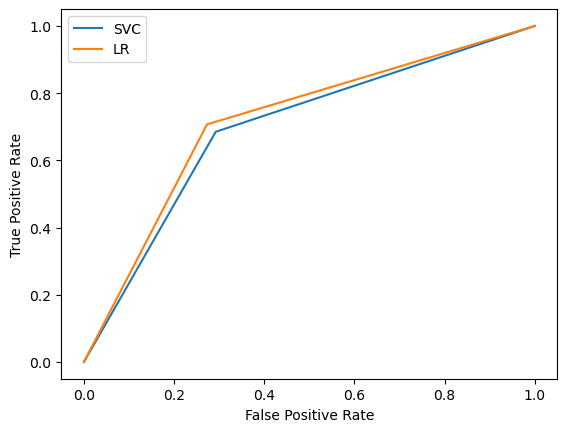

In [32]:
plt.plot(svc_fpr,svc_tpr, label="SVC")
plt.plot(lr_fpr,lr_tpr, label="LR")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

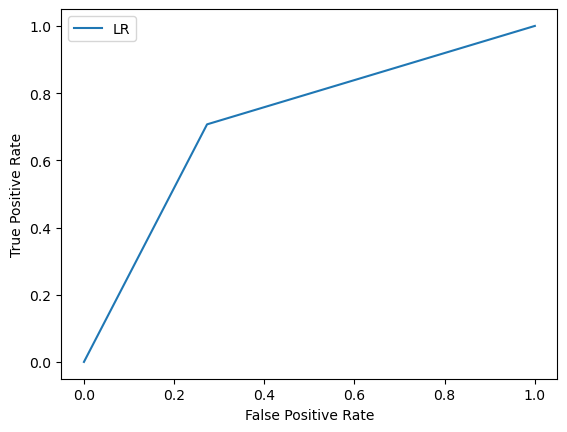

In [33]:
# Logistic Regression Plot
plt.plot(lr_fpr,lr_tpr, label="LR")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

In [34]:
from tensorflow import keras
from keras.models import Sequential
# from keras.layers import Dense
# from keras.layers import LSTM
from keras.layers import Dense, Activation, LSTM, Embedding, Dropout, Conv2D, MaxPool2D
from keras import optimizers
from keras.utils import np_utils
from sklearn.linear_model import Perceptron

In [35]:
p = Perceptron(random_state=42)
p.fit(X_train, y_train)

C:\Users\Joshua\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Perceptron(random_state=42)

In [36]:
p.score(X_train, y_train)

0.9996016465276856

In [37]:
p.score(X_test, y_test)

0.6956983536909187

In [38]:
nn_pred = p.predict(X_test)
print(classification_report(y_test, nn_pred))

              precision    recall  f1-score   support

           0       0.67      0.75      0.71       934
           1       0.72      0.64      0.68       949

    accuracy                           0.70      1883
   macro avg       0.70      0.70      0.69      1883
weighted avg       0.70      0.70      0.69      1883



In [39]:
nn_fpr, nn_tpr, _ = roc_curve(y_test, nn_pred)

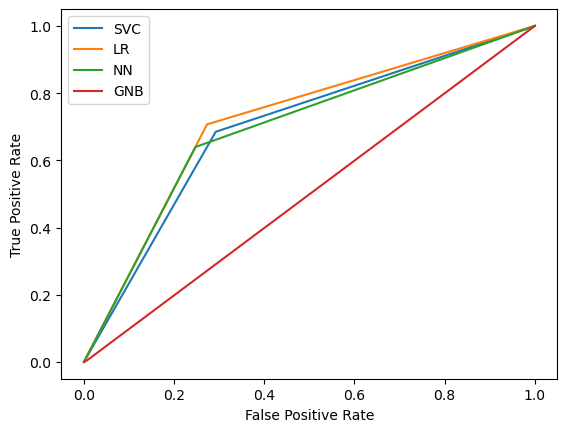

In [40]:
plt.plot(svc_fpr,svc_tpr, label="SVC")
plt.plot(lr_fpr,lr_tpr, label="LR")
plt.plot(nn_fpr,nn_tpr, label="NN")
plt.plot(gnb_fpr,gnb_tpr, label="GNB")


plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

In [41]:
# model = Sequential()

# model.add(Dense(100, input_shape=(None,25000))) 
# model.add(Activation('relu'))
# #model.add(Dropout(0.2)) 

# model.add(Dense(200))
# model.add(Activation('relu'))
# # model.add(Dropout(0.2))

# model.add(Dense(1))
# model.add(Activation('sigmoid'))


# model.summary()

# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [42]:
# history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split = 0.2)

In [43]:
# Create metadata
n_channels = 306
sampling_freq = 250  # in Hertz
info = mne.create_info(n_channels, sfreq=sampling_freq)
print(info)

<Info | 7 non-empty values
 bads: []
 ch_names: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, ...
 chs: 306 misc
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: unspecified
 nchan: 306
 projs: []
 sfreq: 250.0 Hz
>


In [44]:
raws = [trials]

In [45]:
s1['X'][0]

array([[ 4.71374025e-12,  5.23809945e-12, -1.94108792e-12, ...,
         9.17573222e-12,  9.09685608e-12, -1.17312019e-11],
       [-2.05548699e-13,  8.94469936e-13,  2.32704286e-12, ...,
        -1.48542409e-12,  8.63054420e-13, -5.81151446e-12],
       [-2.81083967e-13, -2.55566591e-13, -1.14635813e-13, ...,
         2.02158684e-13,  2.64378851e-13,  1.49159080e-14],
       ...,
       [ 6.19402663e-12,  1.37941850e-12,  3.14390332e-13, ...,
        -3.57446451e-12, -6.13546627e-12, -2.76505771e-12],
       [-4.29254592e-12, -1.08209665e-11, -1.22503622e-11, ...,
        -2.13305805e-12,  1.59175234e-12,  4.20430834e-12],
       [-1.05882049e-14,  2.03639477e-14,  2.91915463e-15, ...,
        -5.75406489e-14, -1.58884204e-13, -1.19616773e-13]], dtype=float32)

In [46]:
s1['X'][1]

array([[-5.7927364e-14, -4.6676387e-12,  6.6167297e-13, ...,
         1.7905276e-12, -7.3468323e-12, -3.6288587e-12],
       [ 5.1111246e-12,  6.6202301e-13, -1.1137356e-12, ...,
        -1.5834578e-12,  1.5251901e-12,  1.3203788e-12],
       [ 3.7314203e-13,  3.8563548e-13,  1.8007492e-13, ...,
        -3.1592320e-13, -4.9586122e-13, -2.9899729e-13],
       ...,
       [ 9.3906844e-12,  9.5434771e-12,  6.1927533e-12, ...,
         8.3604148e-12, -6.3586300e-13, -2.2867947e-12],
       [ 4.1704691e-12,  2.6723014e-12, -5.3051075e-12, ...,
        -6.3720552e-12, -7.5214028e-12, -6.5134426e-12],
       [-5.0697534e-14, -1.7809562e-14,  9.0708237e-14, ...,
         2.8727099e-13,  1.6909830e-13,  1.1492741e-13]], dtype=float32)

In [47]:
raws[0] = mne.io.RawArray(s1['X'][0], info)

Creating RawArray with float64 data, n_channels=306, n_times=375
    Range : 0 ... 374 =      0.000 ...     1.496 secs
Ready.


In [48]:
raws[0]

<RawArray | 306 x 375 (1.5 s), ~1.2 MB, data loaded>

Using matplotlib as 2D backend.


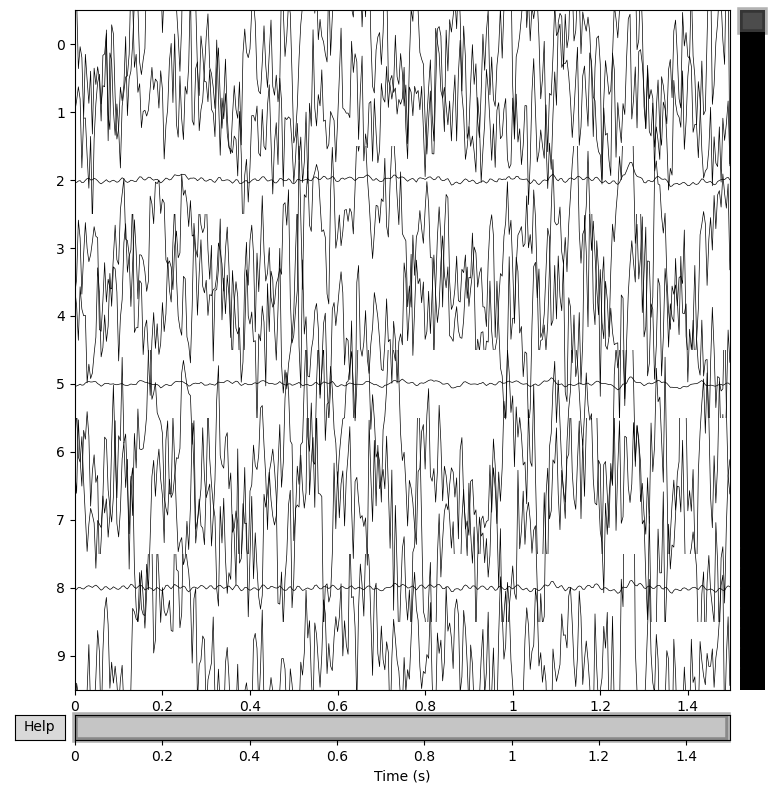

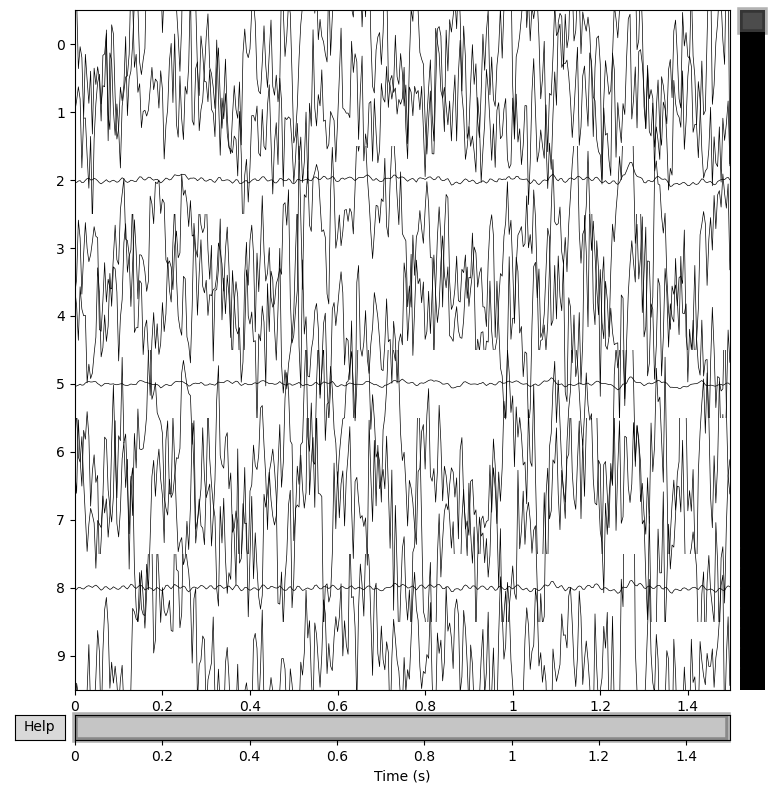

In [49]:
raws[0].plot(show_scrollbars=True, show_scalebars=False,n_channels=10)

In [50]:
# raws[0].compute_psd().plot()
# raws[0].plot(duration=5, n_channels=30)

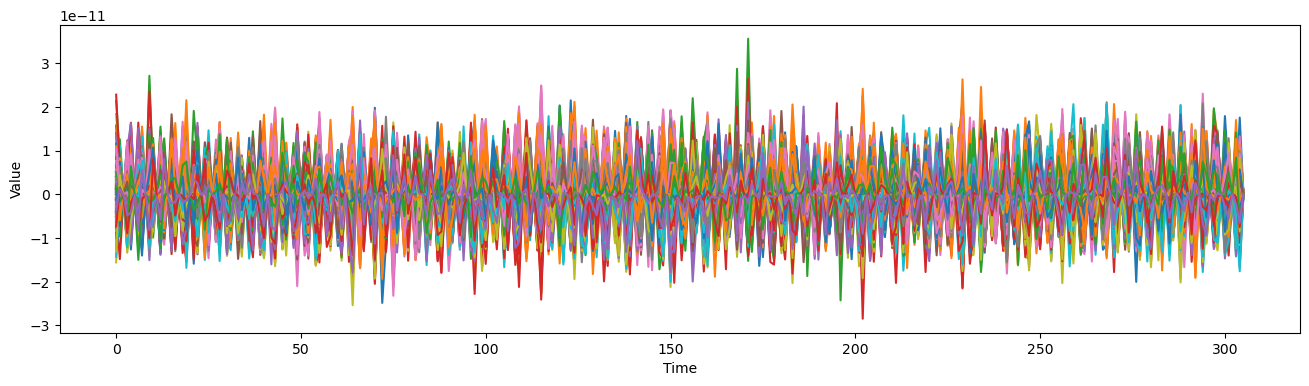

In [51]:
# Plotting the signal from the first channel from the first trail
plt.figure(figsize=(16,4))
plt.plot(s1['X'][1])
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

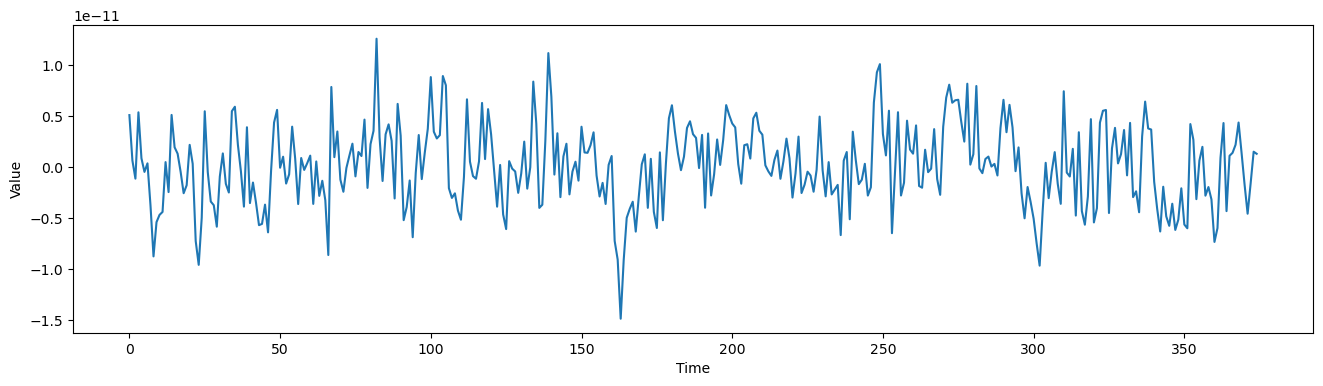

In [52]:
# Plotting the signal from the first channel from the first trail
plt.figure(figsize=(16,4))
plt.plot(s1['X'][1][1])
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

In [53]:
# data shape manipulation

In [54]:
s1['X'].shape

(594, 306, 375)

In [55]:
s1['X'] =  s1['X'].reshape(s1['X'].shape[0], s1['X'].shape[1] * s1['X'].shape[2])


In [56]:
s1['X'].shape

(594, 114750)

In [57]:
s1['X']

array([[ 4.71374025e-12,  5.23809945e-12, -1.94108792e-12, ...,
        -5.75406489e-14, -1.58884204e-13, -1.19616773e-13],
       [-5.79273635e-14, -4.66763867e-12,  6.61672973e-13, ...,
         2.87270994e-13,  1.69098297e-13,  1.14927409e-13],
       [-1.22772072e-12, -3.00992304e-12,  2.83001622e-13, ...,
        -3.43089128e-15, -8.20660881e-14,  2.99675217e-15],
       ...,
       [-3.42552836e-13, -3.41123766e-12, -3.39542760e-12, ...,
        -2.13391953e-13, -2.22670677e-13, -1.14963432e-13],
       [ 5.53162464e-12,  1.21710897e-11,  8.93848450e-12, ...,
        -1.50325837e-13,  1.35453552e-13,  3.41031457e-14],
       [-2.61280602e-12, -2.92649542e-12, -4.49190208e-12, ...,
        -1.79292684e-14, -1.19245759e-13, -1.11308146e-13]], dtype=float32)

In [58]:
s1

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Sat Apr  5 19:16:41 2014',
 '__version__': '1.0',
 '__globals__': [],
 'tmin': array([[-0.5]]),
 'tmax': array([[1.]]),
 'sfreq': array([[250.]]),
 'y': array([[0],
        [0],
        [1],
        [1],
        [0],
        [0],
        [0],
        [1],
        [0],
        [1],
        [1],
        [1],
        [0],
        [1],
        [0],
        [1],
        [1],
        [0],
        [1],
        [1],
        [1],
        [1],
        [1],
        [0],
        [1],
        [0],
        [1],
        [0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [1],
        [0],
        [1],
        [1],
        [1],
        [1],
        [0],
        [1],
        [1],
        [0],
        [0],
        [1],
        [1],
        [0],
        [1],
        [0],
        [1],
        [1],
        [0],
        [0],
        [1],
        [1],
        [0],
        [1],
        [1],
        [0],
        [0],
  